#Sign Language Translator
To use, download the dataset and run cells in this order:


1.   Libraries
2.   Loading and Splitting Dataset
3.   Data Augmentation
4.   "Reading saved model" under Save Model
5.   Identifying Sign Language from Video Capture



###Load and Extract [Dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet)
First cell for use in Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [1]:
%pip install patool

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for patool from https://files.pythonhosted.org/packages/a4/1e/440d6f0de850771c05773958546485f74cfa9c72ff7926d0af5ab256c2e7/patool-2.1.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/94.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/94.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/94.6 kB ? eta -:--:--
   ------------ --------------------------- 30.7/94.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 94.6/94.6 kB 897.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\aksha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#unzip dataset
import patoolib
patoolib.extract_archive('archive.zip')

INFO patool: Extracting archive.zip ...
INFO patool: running "C:\Program Files\7-Zip\7z.EXE" x -oc:\Users\aksha\OneDrive\Documents\SL_Translator\Unpack_8p67e2vc -- archive.zip
INFO patool:     with creationflags=134217728, input=
INFO patool: ... archive.zip extracted to `archive' (multiple files in root).


'archive'

## Libraries

In [1]:
%pip install scikeras
%pip install h5py
%pip install mediapipe
%pip install tensorflow

  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.



  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached wheel-0.42.0-py3-none-any.whl (65 kB)
  Using cached Markdown-3.4.4-py3-none-any.whl (94 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [7]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [57]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


Run this

In [2]:
#neural network
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D , MaxPool2D , Flatten , Dropout, RandomFlip, RandomRotation, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import SGD, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import model_from_json, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

#data operations
import numpy as np
import math

#metrics/evaluation
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#visualization
import matplotlib.pyplot as plt

#load dataset
import os
import cv2
from sklearn.model_selection import train_test_split

#random numbers
import random

#hand recognition
import mediapipe as mp
import time

#data augmentation
from scipy import ndimage
from skimage.util import random_noise

from skimage.transform import resize

import h5py



##Loading and Splitting Dataset

Make NumPy array with a random selection of the image data.

Run this

In [3]:
IMAGE_DIMENSIONS = 64
NUM_IMGS = 1500 #sample size limited by computer capabilities
dir = "archive/asl_alphabet_train/asl_alphabet_train"
CLASS_NAMES = sorted([directory for directory in os.listdir(dir)])
print(len(CLASS_NAMES))

26


In [40]:
#read image data into numpy array
raw_data = []
for name in CLASS_NAMES:
  label_path = os.path.join(dir, name) #directory with all of the images for a certain sign
  for i in range(NUM_IMGS):
    img = random.sample(os.listdir(label_path), 1)[0]
    try:
      img_arr = cv2.imread(os.path.join(label_path, img))
      resized_img = cv2.resize(img_arr, (IMAGE_DIMENSIONS, IMAGE_DIMENSIONS)) #reshape images just in case
      final_img = cv2.addWeighted(resized_img, 1, resized_img, 0, 10) #increase brightness
      raw_data.append([final_img, name])
    except Exception as e:
      print(e)

data = np.array(raw_data, dtype='object')


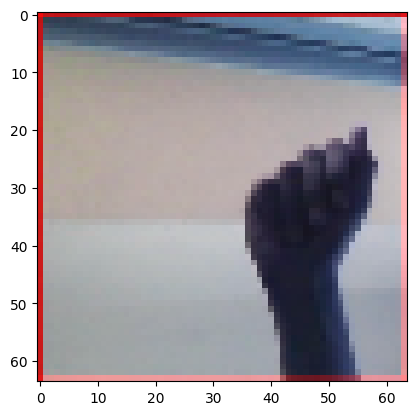

In [46]:
data[0]
%matplotlib inline 
plt.imshow(raw_data[0][0])

In [47]:
#save data array to binary
np.save("data_small.npy", data, allow_pickle=True)

In [4]:
#load array from binary
loaded_arr = np.load("data_small.npy", allow_pickle=True)

Split data into features and labels. \
80/10/10 Train/Val/Test Split

In [4]:
%matplotlib inline

In [5]:
features = [i[0] for i in loaded_arr]
labels = [i[1] for i in loaded_arr]
train_X, test_X, train_Y, test_Y = train_test_split(features, labels, train_size=0.8, shuffle=True, random_state=1, stratify=labels)

label_encoder = preprocessing.LabelEncoder()

train_X = np.array(train_X, dtype='float') / 255.0
train_Y = label_encoder.fit_transform(train_Y)
test_X = np.array(test_X, dtype='float') / 255.0
test_Y = label_encoder.fit_transform(test_Y)

del features
del labels
#del data
#del raw_data

17

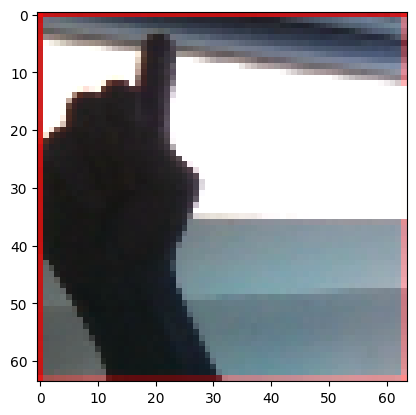

In [6]:
plt.imshow(train_X[170])
train_Y[0]


##Baseline Model
Create CNN model with no regularization, augmentation, or hyperparameter tuning as a baseline.

In [9]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, patience=4)

In [7]:
base_model = Sequential()
base_model.add(Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[IMAGE_DIMENSIONS,IMAGE_DIMENSIONS,3]))
base_model.add(Dropout(0.1))
base_model.add(MaxPool2D((2,2)))
base_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
base_model.add(MaxPool2D((2, 2)))
base_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
base_model.add(MaxPool2D((2, 2)))
base_model.add(Flatten())
base_model.add(Dropout(0.25))
base_model.add(Dense(128))
base_model.add(Dense(len(CLASS_NAMES), activation='softmax'))
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        3

In [10]:
base_model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = base_model.fit(train_X, train_Y, epochs=50, batch_size=32,
                    validation_data=(test_X, test_Y), callbacks=[es,mc])

Epoch 1/50
975/975 [==============================] - ETA: 0s - loss: 1.2620 - accuracy: 0.6087
Epoch 1: val_loss improved from inf to 0.40318, saving model to model.h5
975/975 [==============================] - 182s 185ms/step - loss: 1.2620 - accuracy: 0.6087 - val_loss: 0.4032 - val_accuracy: 0.8695
Epoch 2/50
975/975 [==============================] - ETA: 0s - loss: 0.3451 - accuracy: 0.8860
Epoch 2: val_loss improved from 0.40318 to 0.18019, saving model to model.h5
975/975 [==============================] - 172s 177ms/step - loss: 0.3451 - accuracy: 0.8860 - val_loss: 0.1802 - val_accuracy: 0.9478
Epoch 3/50
975/975 [==============================] - ETA: 0s - loss: 0.2002 - accuracy: 0.9330
Epoch 3: val_loss did not improve from 0.18019
975/975 [==============================] - 148s 152ms/step - loss: 0.2002 - accuracy: 0.9330 - val_loss: 0.1842 - val_accuracy: 0.9451
Epoch 4/50
975/975 [==============================] - ETA: 0s - loss: 0.1564 - accuracy: 0.9493
Epoch 4: val_l

Baseline accuracy estimate.

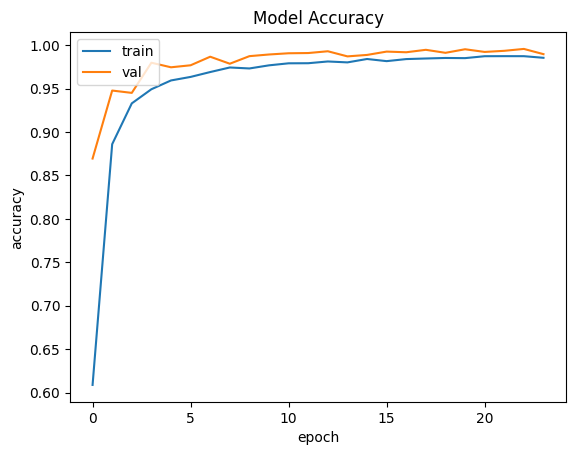

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Run this

In [5]:
final_model = load_model('model.h5')

##Identifying Sign Language From Video Capture

Run this

In [44]:
#use webcam
vid = cv2.VideoCapture(0)

#hand identifier
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, model_complexity=0, min_detection_confidence=0.5, min_tracking_confidence=0.5)

while(True):
  ret, frame = vid.read()

  #if a frame returns empty
  if not ret:
    print("Ignoring empty frame")
    continue

  #camera dimensions
  h, w, _ = frame.shape

  #change color format so the hand identifier can read it
  frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  results = hands.process(frameRGB)

  #runs if a hand is identified
  if results.multi_hand_landmarks:
    #loops if there are multiple hands
    for handLMs in results.multi_hand_landmarks:
      #find dimensions of bounding box
      x_max = 0
      y_max = 0
      x_min = w
      y_min = h
      #loops through pre-identified nodes on the hand
      for lm in handLMs.landmark:
        x, y = int(lm.x * w), int(lm.y * h)
        if x > x_max:
          x_max = x
        if x < x_min:
          x_min = x
        if x_min < 0:
          x_min = 0
        if y > y_max:
          y_max = y
        if y < y_min:
          y_min = y
        if y_min < 0:
          y_min = 0
      #crop camera image to just the hand
      cropped = frame[x_min:x_max, y_min:y_max]
      
      #resize cropped image so it can be passed into the model
      cropped2 = cv2.resize(cropped, (IMAGE_DIMENSIONS, IMAGE_DIMENSIONS))
      
      hand = np.array(cropped2, dtype='float') / 255.0

      hand.reshape((64, 64, 3))
      
      
      #return the sign prediction from the deep learning model (0 to len(CLASS_NAMES))
      
      prediction = final_model.predict(np.array([hand]), verbose=0)
      #draw bounding box
      cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
      #display prediction
      cv2.putText(frame, CLASS_NAMES[np.argmax(prediction[0])], (x_min, y_max), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
      
      
  cv2.imshow("Sign Language Translator", frame)

  #press q to quit
  if cv2.waitKey(1) == ord('q'):
    break

vid.release()

286 0 351 221
(64, 64, 3)
275 0 351 213
(64, 64, 3)
345 106 348 190
(64, 64, 3)
387 143 352 119
(64, 64, 3)
429 169 343 98
(64, 64, 3)
429 173 344 100
(64, 64, 3)
428 171 342 97
(64, 64, 3)
427 167 340 97
(64, 64, 3)
426 163 343 99
(64, 64, 3)
425 162 338 99
(64, 64, 3)
424 162 336 98
(64, 64, 3)
409 177 334 142
(64, 64, 3)
370 195 324 153
(64, 64, 3)
352 187 306 133
(64, 64, 3)
352 181 304 141
(64, 64, 3)
355 183 304 142
(64, 64, 3)
358 184 306 144
(64, 64, 3)
358 184 307 145
(64, 64, 3)
358 184 307 145
(64, 64, 3)
358 184 307 144
(64, 64, 3)
357 184 306 146
(64, 64, 3)
357 183 306 145
(64, 64, 3)
357 183 307 145
(64, 64, 3)
356 182 306 145
(64, 64, 3)
356 183 306 143
(64, 64, 3)
356 183 305 142
(64, 64, 3)
356 183 303 140
(64, 64, 3)
376 178 296 110
(64, 64, 3)
374 176 296 107
(64, 64, 3)
376 166 297 102
(64, 64, 3)
393 150 310 65
(64, 64, 3)
399 139 316 53
(64, 64, 3)
397 136 316 52
(64, 64, 3)
400 134 316 48
(64, 64, 3)
401 133 317 46
(64, 64, 3)
400 135 315 45
(64, 64, 3)
399 135 

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
